In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
font = {'weight' : 'medium',
       'size'   : 13}
matplotlib.rc('font', **font)

import time

import concurrent.futures as cf

import warnings
warnings.filterwarnings("ignore")

import scipy.constants
mec2 = scipy.constants.value('electron mass energy equivalent in MeV')*1e6
c_light = scipy.constants.c
e_charge = scipy.constants.e
r_e = scipy.constants.value('classical electron radius')

In [62]:
from csr2d.core2 import psi_x0_SC, psi_s_SC
from csr2d.kick2 import green_meshes_SC
from csr2d.convolution import fftconvolve2

In [3]:
gamma = 500
beta = (1-1/gamma**2)**(1/2)
rho = 1

sigma_x = 10e-6
sigma_z = 10e-6


In [73]:
psi_x0_SC(2*sigma_z, -sigma_x, beta,dx)*factor

-0.40163493290790914

In [86]:
def lamb_2d(z,x):
    return 1/(2*np.pi*sigma_x*sigma_z)* np.exp(-z**2 / 2 / sigma_z**2 - x**2 / 2 / sigma_x**2)
def lamb_2d_prime(z,x):
    return 1/(2*np.pi*sigma_x*sigma_z)* np.exp(-z**2 / 2 / sigma_z**2 - x**2 / 2 / sigma_x**2) * (-z / sigma_z**2)


nz = 301
nx = 301

zvec = np.linspace(-5*sigma_z, 5*sigma_z, nz)
xvec = np.linspace(-5*sigma_x, 5*sigma_x, nx)
zm, xm = np.meshgrid(zvec, xvec, indexing='ij')

lambda_grid_filtered = lamb_2d(zm,xm)
lambda_grid_filtered_prime = lamb_2d_prime(zm,xm)

dz = (10*sigma_z) / (nz - 1)
dx = (10*sigma_x) / (nx - 1)

psi_s_grid, psi_x_grid, zvec2, xvec2 = green_meshes_SC(nz, nx, dz, dx, rho=rho, beta=beta)  

factor = 1/rho/gamma**2  # Note that this factor is different for space-charge term

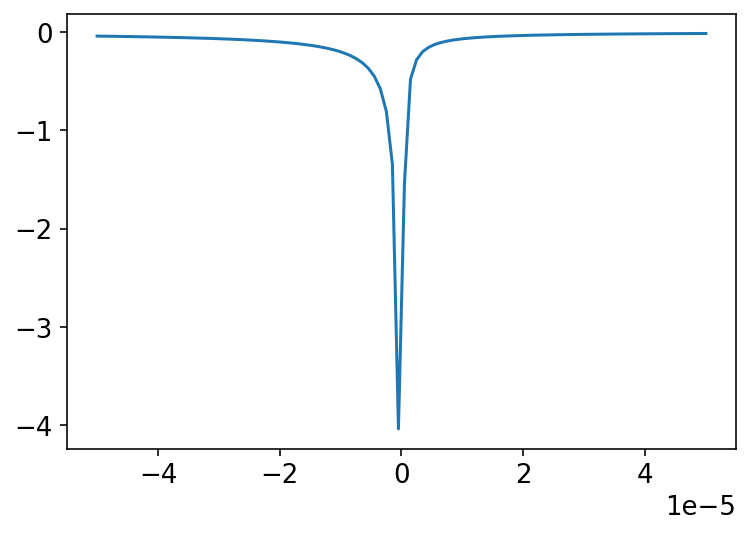

In [81]:
plt.plot(zvec, factor * psi_s_SC(zvec,-sigma_x,beta))

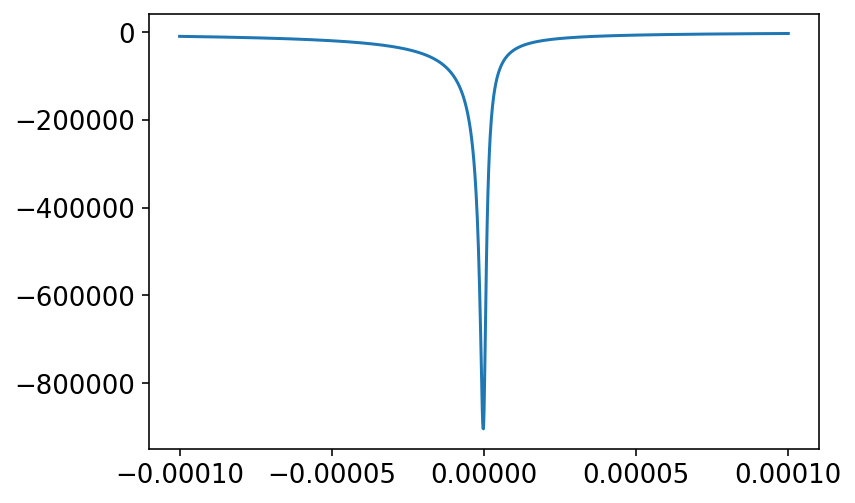

In [65]:
plt.plot(zvec2, psi_s_grid[:,x_observe])

Text(0.5, 0.92, '$W_x(SC)$ benchmarking')

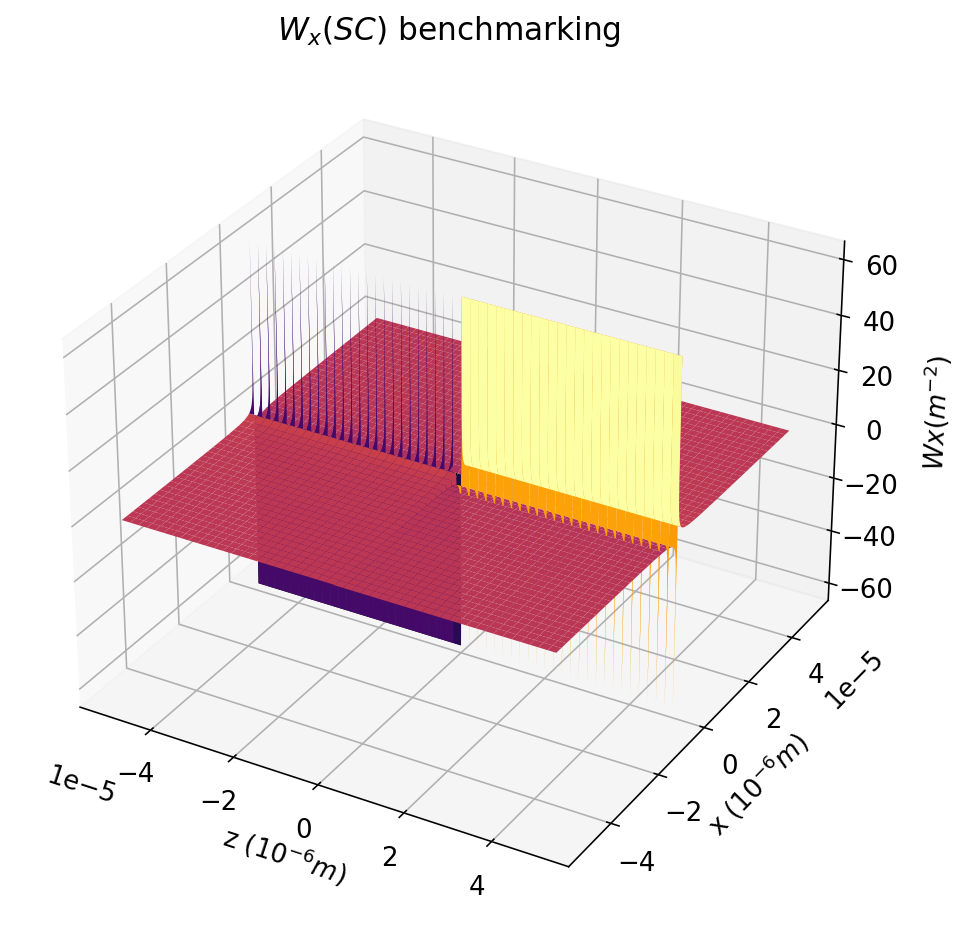

In [71]:
fig, ax = plt.subplots(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(zm, xm, factor*psi_x0_SC(zm,xm,beta,dx), cmap='inferno', zorder=1)


ax.set_xlabel(r'z $(10^{-6}m)$')
ax.set_ylabel(r'x $(10^{-6}m)$')
ax.set_zlabel(r'$Wx (m^{-2})$ ')
ax.zaxis.labelpad = 10
ax.set_title(r'$W_x(SC)$ benchmarking')

#ax.azim = 60

In [87]:
conv_s, conv_x = fftconvolve2(lambda_grid_filtered_prime, psi_s_grid, psi_x_grid)
Ws_grid = factor * conv_s *dz*dx
Wx_grid = factor * conv_x * dz*dx

In [90]:
xvec.shape

(301,)

In [88]:
z_observe = 0
x_observe = sigma_x

z_observe_index = np.argmin(np.abs(zvec - x_observe))
print('z_observe_index :', z_observe_index )
x_observe_index = np.argmin(np.abs(xvec - x_observe))
print('x_observe_index :', x_observe_index )

z_observe_index : 180
x_observe_index : 180


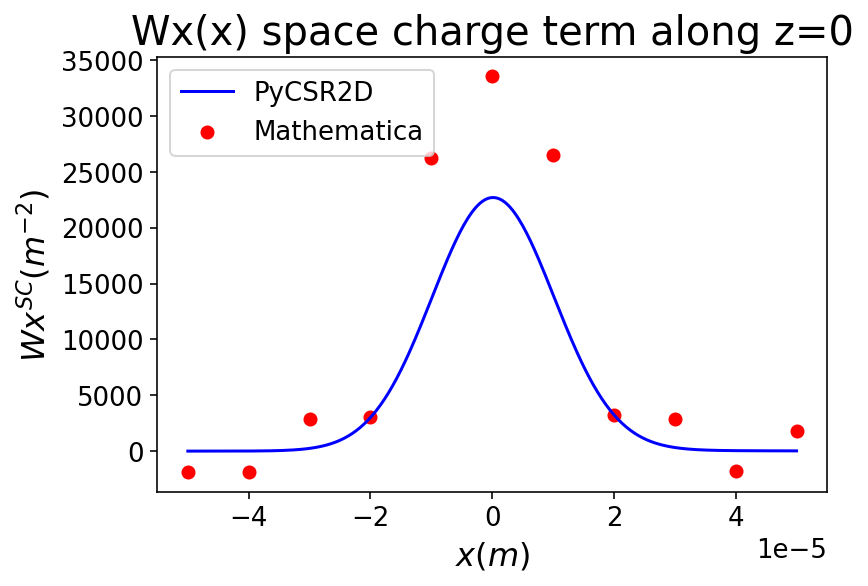

In [91]:
plt.plot(zvec, Wx_grid[:,x_observe_index], c='blue', label='PyCSR2D')
plt.scatter(zz, Wx_mathematica, c='red', label='Mathematica')
plt.xlabel(r'$x(m)$', fontsize=16)
plt.ylabel(r'$Wx^{SC}(m^{-2})$', fontsize=16)
plt.title(r'Wx(x) space charge term along z=0', fontsize=20)
plt.legend()

In [ ]:
{{-(1/20000), -1854.62}, {-(1/25000), -1824.95}, {-(3/100000), 
  2855.8}, {-(1/50000), 3061.19}, {-(1/100000), 26195.3}, {0, 
  33533.7}, {1/100000, 26522.3}, {1/50000, 3233.73}, {3/100000, 
  2909.64}, {1/25000, -1799.92}, {1/20000, -1840.95}}

In [85]:
zz = np.arange(-5,6,1)*sigma_z

Wx_mathematica = np.array([-1854.62, -1824.95, 2855.8 , 3061.19,26195.3,33533.7,26522.3,3233.73, 2909.64,-1799.92, 1840.95])

In [47]:
xx = np.array([-3*sigma_x, -2*sigma_x,-sigma_x,0,sigma_x,2*sigma_x, 3*sigma_x])

In [48]:
Wx_mathematica = np.array([-10694.3,-13974.3, -12735.1, -176.974, 12382.7,13626.6, 10353.6])

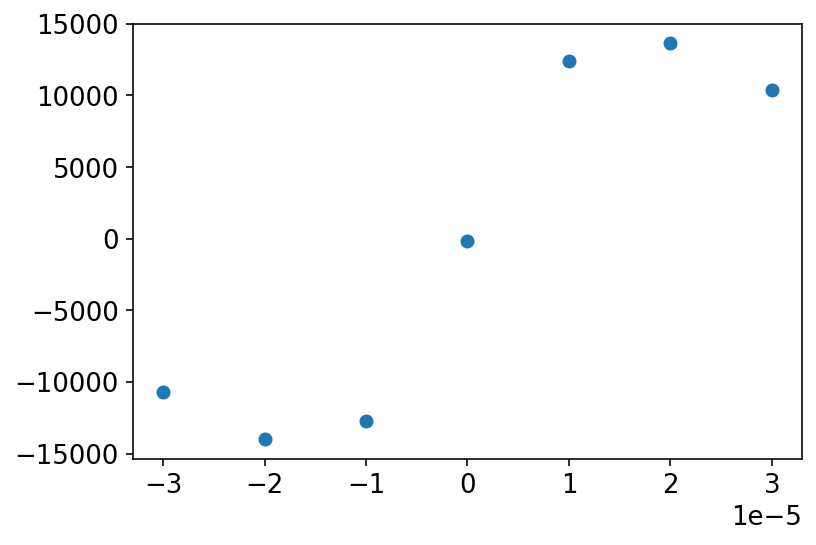